In [3]:
#these two commands below will automatically download the dataset on your device
#!pip3 install kaggle-cli
#!kg download -u yourUsername -p yourPassword -c 'digit-recognizer' -f train.csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
mn = pd.read_csv("train.csv")
labels = mn["label"]               #make a separate dataframe for labels
mn = mn.drop("label",axis=1)       #delete the labels columns from main dataframe

In [6]:
print(mn.shape) #42k datapoints

(42000, 784)


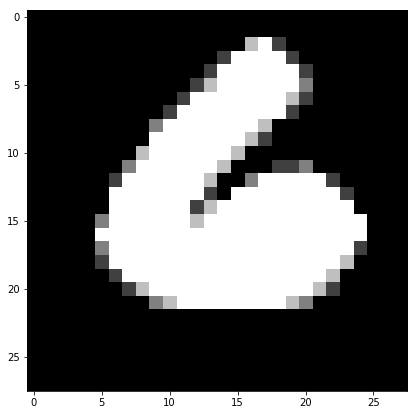

6


In [7]:
#just a sample, trying to see if data is imported okay, image and number below it both match here, data is okay!
plt.figure(figsize=(7,7))
pixels = mn.loc[500].as_matrix().reshape(28,28) #Make a 28x28 matrix. First 28 values goto 1st row,second batch of 28 goes to 2nd row and so on...
plt.imshow(pixels,interpolation='none', cmap='gray')
plt.show() # print the image @ 500
print(labels[500]) #print the actual label @ 500

In [8]:
from sklearn.preprocessing import StandardScaler
new_data = StandardScaler().fit_transform(mn) # mean zero and std.dev 1

covariance_matrix = np.matmul(mn.T,mn) #covariance matrix needed for eighen vectors and values

In [11]:
from scipy.linalg import eigh
values, vectors = eigh(covariance_matrix, eigvals=(782,783)) #calculate eighen values and vectors using covariance matrix
#we take only the first 2 eighen vectors for our study, as they will have maximum variance. Hence the 782,783 in bracket
#By default the eighen values are sorted in ascending order, we take the last two with max variance

vectors = vectors.T #transpose because further operations will require it

In [12]:
new_features = np.matmul(vectors,mn.T).T
print(vectors.shape)    #vectors have 2 x n size
print(mn.T.shape)       #main feature dataframe transpose has n x 42k size
#hence resulting matrix is 2 x 42k, we take the transpose of it to get standard format,i.e, columns as features and rows as datapoints
print(new_features.shape)

(2, 784)
(784, 42000)
(42000, 2)


In [13]:
new_features = np.column_stack((new_features, labels))
print(labels.shape)
print(new_features.shape)

(42000,)
(42000, 3)


In [14]:
new_mn = pd.DataFrame(data=new_features, columns=("1st_principal", "2nd_principal", "label"))

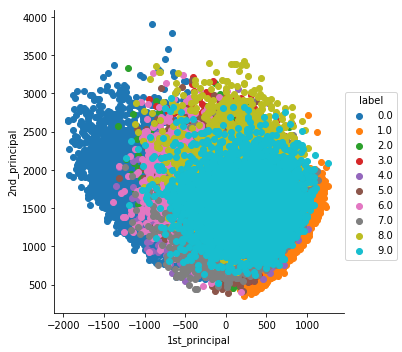

In [15]:
import seaborn as sns
sns.FacetGrid(new_mn, hue="label", size=5).map(plt.scatter, '1st_principal', '2nd_principal').add_legend()
plt.show()

#As you can see, PCA provides no value here

In [22]:
#t-SNE graph

#from sklearn.manifold import TSNE
#I came across this library while searching for ways to speed up t-SNE, go this link to get it. It also has some instructions on how to se the library up
# https://github.com/DmitryUlyanov/Multicore-TSNE
from MulticoreTSNE import MulticoreTSNE as TSNE



def plotSNE(feat, lab, name, perplex=50, iterations= 5000):
  model = TSNE(n_jobs=4)
  tsne_data = model.fit_transform(feat).T
  # creating a new data fram which help us in ploting the result data
  tsne_data = np.vstack((tsne_data, lab)).T
  tsne_df = pd.DataFrame(data=tsne_data, columns=("Dim_1", "Dim_2", "label"))
  tsne_df.to_csv(name)  
  # Ploting the result of tsne
  sns.FacetGrid(tsne_df, hue="label", size=6).map(plt.scatter, 'Dim_1', 'Dim_2').add_legend()
  plt.title("{} iterations with perplexity = {}".format(iterations, perplex))
  plt.show()



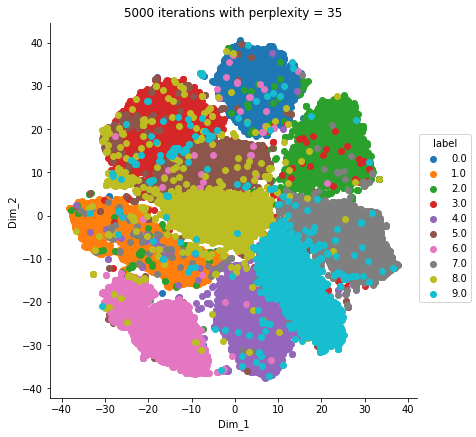

In [13]:
#Using this function shortens the code required for running multiple iterations of t-SNE. 
plotSNE(mn,labels,"second.csv",35)

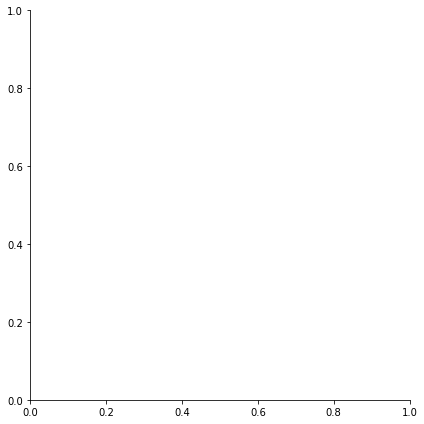

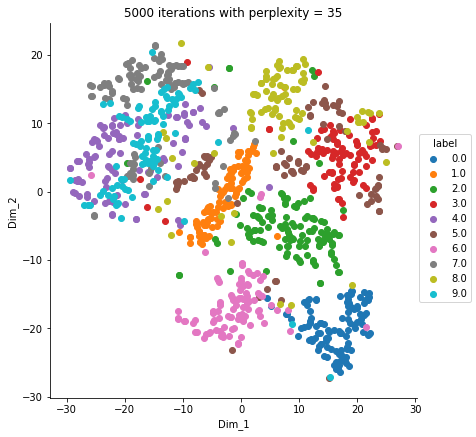

In [23]:
#Using this function shortens the code required for running multiple iterations of t-SNE. 
plotSNE(mn[0:1000],labels[0:1000],"second.csv",35)